# Data Discovery: CMR-STAC API

---

## Summary

In this notebook we will use the [SpatioTemporal Asset Catalog (STAC)](https://stacspec.org/) and the [CMR-STAC](https://github.com/nasa/cmr-stac) API to identify Harmonized Landsat Sentinel-2 (HLS) assets that fall within our region of interest (ROI) and within our specified time range. The CMR-STAC API is NASA's implementation of the STAC API specification for all NASA data holdings within EOSDIS. The current implementation allows users to execute searches within provider catalogs (e.g., LPCLOUD) to find the STAC Items they are searching for. All the providers can be found at the CMR-STAC endpoint here: <https://cmr.earthdata.nasa.gov/stac/>. In this exercise, we will query the **LPCLOUD** provider to identify STAC Items matching our search criteria.

After finding the results we are interested in, we will write a text file output with links that will allow us to access the HLS assets in the cloud. We will create an example text file of these cloud access links for use via HTTPS and Amazon Web Services s3 buckets.

### What is STAC?  

[SpatioTemporal Asset Catalog (STAC)](https://stacspec.org/) is a specification that provides a common language for interpreting geospatial information in order to standardize indexing and discovering data.  

The [STAC specification](https://stacspec.org/core.html) is made up of a collection of related, yet independent specifications that when used together provide search and discovery capabilities for remove assets.

#### Four STAC Specifications  

- [STAC Item](https://github.com/radiantearth/stac-spec/blob/master/item-spec/item-spec.md)
- [STAC Catalog](https://github.com/radiantearth/stac-spec/blob/master/catalog-spec/catalog-spec.md)
- [STAC Collection](https://github.com/radiantearth/stac-spec/blob/master/collection-spec/collection-spec.md)
- [STAC API](https://github.com/radiantearth/stac-api-spec)

In the following sections, we will explore each of STAC element using NASA's Common Metadata Repository (CMR) STAC application programming interface (API), or [CMR-STAC API](https://github.com/nasa/cmr-stac) for short.  

---

## Exercise

### Import Required Packages

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
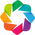

In [1]:
import requests
from pystac_client import Client       # https://pystac-client.readthedocs.io/en/latest/index.html  
from collections import defaultdict    
import json
import geopandas
import geoviews as gv
from cartopy import crs
gv.extension('bokeh', 'matplotlib')

### Submit `GET` request to the CMR STAC API

Use the `reqests` package to submit a `GET` request to the CMR STAC API. We'll parse the response and extract the information we need to navigate the STAC Catalog.

In [2]:
stac_url = 'https://cmr.earthdata.nasa.gov/stac'

In [3]:
provider_cat = requests.get(stac_url)

The CMR STAC API endpoint lists the available providers. Each **provider** is a seperate STAC Catalog endpoint that can be used to submit spatiotemporal queries agaist.

In [4]:
providers = [p['title'] for p in provider_cat.json()['links'] if 'child' in p['rel']]
providers

['ESA',
 'GHRC',
 'ECHO',
 'ISRO',
 'EDF_DEV04',
 'ASF',
 'EUMETSAT',
 'CDDIS',
 'JAXA',
 'AU_AADC',
 'ECHO10_OPS',
 'LANCEAMSR2',
 'GESDISCCLD',
 'GHRSSTCWIC',
 'LARC_CLOUD',
 'LANCEMODIS',
 'NSIDCV0',
 'NSIDC_ECS',
 'NCCS',
 'OBPG',
 'OMINRT',
 'USGS_LTA',
 'ASIPS',
 'ESDIS',
 'NSIDC_CPRD',
 'ORNL_CLOUD',
 'FEDEO',
 'MLHUB',
 'LAADS',
 'LARC_ASDC',
 'LPDAAC_ECS',
 'NOAA_NCEI',
 'OB_DAAC',
 'XYZ_PROV',
 'GHRC_DAAC',
 'CSDA',
 'NRSCC',
 'CEOS_EXTRA',
 'AMD_KOPRI',
 'AMD_USAPDC',
 'LARC',
 'SCIOPS',
 'USGS_EROS',
 'LPCUMULUS',
 'MOPITT',
 'GHRC_CLOUD',
 'LPCLOUD',
 'ORNL_DAAC',
 'CCMEO',
 'POCLOUD',
 'PODAAC',
 'SEDAC',
 'GES_DISC',
 'LM_FIRMS',
 'ENVIDAT',
 'OB_CLOUD',
 'USGS']

### Explore the `LPCLOUD` provider

In [5]:
provider = 'LPCLOUD'

In [6]:
provider_url = f'{stac_url}/{provider}'
provider_url

'https://cmr.earthdata.nasa.gov/stac/LPCLOUD'

In [7]:
cat = requests.get(provider_url)
cat.json()

{'id': 'LPCLOUD',
 'title': 'LPCLOUD',
 'description': 'Root catalog for LPCLOUD',
 'type': 'Catalog',
 'stac_version': '1.0.0',
 'links': [{'rel': 'self',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD',
   'title': 'Provider catalog',
   'type': 'application/json'},
  {'rel': 'root',
   'href': 'https://cmr.earthdata.nasa.gov/stac/',
   'title': 'Root catalog',
   'type': 'application/json'},
  {'rel': 'collections',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections',
   'title': 'Provider Collections',
   'type': 'application/json'},
  {'rel': 'search',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/search',
   'title': 'Provider Item Search',
   'type': 'application/geo+json',
   'method': 'GET'},
  {'rel': 'search',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/search',
   'title': 'Provider Item Search',
   'type': 'application/geo+json',
   'method': 'POST'},
  {'rel': 'conformance',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LP

### List the STAC Collections within the `LPCLOUD` Catalog

In [8]:
cols = [{l['href'].split('/')[-1]: l['href']} for l in cat.json() ['links'] if 'child' in l['rel']]
for c in cols:
    print(c)

{'ASTGTM_NUMNC.v003': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/ASTGTM_NUMNC.v003'}
{'ASTGTM_NC.v003': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/ASTGTM_NC.v003'}
{'ASTGTM.v003': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/ASTGTM.v003'}
{'WaterBalance_Daily_Historical_GRIDMET.v1.5': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/WaterBalance_Daily_Historical_GRIDMET.v1.5'}
{'ECO_L2G_CLOUD.v002': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/ECO_L2G_CLOUD.v002'}
{'ECO_L2G_LSTE.v002': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/ECO_L2G_LSTE.v002'}
{'ECO_L1CG_RAD.v002': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/ECO_L1CG_RAD.v002'}
{'ECO_L1B_ATT.v002': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/ECO_L1B_ATT.v002'}
{'ECO_L2_CLOUD.v002': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/ECO_L2_CLOUD.v002'}
{'ECO_L1B_GEO.v002': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections

**Notice** that only 10 collections are returned here, but the `LPCLOUD` provider has over 100 data products available in Earthdata Cloud. This is because the CMR STAC API returns 10 collections by default. A `limit` parameter can be added to the end of the `LPCLOUD` STAC API endpoint to increase the number of collections returned at one time, but this can sometimes be time consuming. Here we'll loop through each `next` page link to make a seperate request for the next 10 collections from each available page.

In [9]:
try:
    print(f"Requesting page:")
    while nxt_pg := [l for l in cat.json()['links'] if 'next' in l['rel']][0]:
        print(f"{nxt_pg['href'].split('=')[-1]}...", end = ' ')
        cat = requests.get(nxt_pg['href'])
        cols.extend([{l['href'].split('/')[-1]: l['href']} for l in cat.json()['links']if 'child' in l['rel']])
except:
    print('No additional pages')

Requesting page:
2... 3... 4... 5... 6... 7... 8... 9... 10... 11... 12... 13... 14... 15... 16... 17... 18... 19... 20... 21... 22... 23... 24... 25... No additional pages


### Print all available STAC Collections within the `LPCLOUD` Catalog

In [10]:
print(f'LPCLOUD has {len(cols)} Collections')

LPCLOUD has 241 Collections


In [11]:
for c in cols:
    print(c)

{'ASTGTM_NUMNC.v003': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/ASTGTM_NUMNC.v003'}
{'ASTGTM_NC.v003': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/ASTGTM_NC.v003'}
{'ASTGTM.v003': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/ASTGTM.v003'}
{'WaterBalance_Daily_Historical_GRIDMET.v1.5': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/WaterBalance_Daily_Historical_GRIDMET.v1.5'}
{'ECO_L2G_CLOUD.v002': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/ECO_L2G_CLOUD.v002'}
{'ECO_L2G_LSTE.v002': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/ECO_L2G_LSTE.v002'}
{'ECO_L1CG_RAD.v002': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/ECO_L1CG_RAD.v002'}
{'ECO_L1B_ATT.v002': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/ECO_L1B_ATT.v002'}
{'ECO_L2_CLOUD.v002': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/ECO_L2_CLOUD.v002'}
{'ECO_L1B_GEO.v002': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections

### Get information about an individual Collection

Below we'll specify a STAC Collection, `HLSL30.v2.0`, and request the STAC metadata

In [12]:
collection = 'HLSL30.v2.0'

In [13]:
collection_link = list(filter(lambda c: collection == list(c.keys())[0], cols))[0]
collection_link

{'HLSL30.v2.0': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSL30.v2.0'}

In [14]:
requests.get(collection_link[collection]).json()

{'id': 'HLSL30.v2.0',
 'stac_version': '1.0.0',
 'license': 'not-provided',
 'title': 'HLS Landsat Operational Land Imager Surface Reflectance and TOA Brightness Daily Global 30m v2.0',
 'type': 'Collection',
 'description': 'The Harmonized Landsat Sentinel-2 (HLS) project provides consistent surface reflectance (SR) and top of atmosphere (TOA) brightness data from a virtual constellation of satellite sensors. The Operational Land Imager (OLI) is housed aboard the joint NASA/USGS Landsat 8 and Landsat 9 satellites, while the Multi-Spectral Instrument (MSI) is mounted aboard Europe’s Copernicus Sentinel-2A and Sentinel-2B satellites. The combined measurement enables global observations of the land every 2–3 days at 30-meter (m) spatial resolution. The HLS project uses a set of algorithms to obtain seamless products from OLI and MSI that include atmospheric correction, cloud and cloud-shadow masking, spatial co-registration and common gridding, illumination and view angle normalization, 

### Set up query parameters to submit to the CMR-STAC API

For this next sections we'll use a Python package call `pystac_client` to submit a spatiotemporal querie for data assets across multiple Collections. We will define our area of interest using the geojson file from the previous exercise, while also specifying the data collections and time range of needed for our example.

In [15]:
field = geopandas.read_file('../data/ne_w_agfields.geojson')
field

,geometry
0,"POLYGON ((-101.67272 41.04754, -101.65345 41.0..."


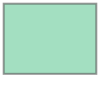

In [16]:
fieldShape = field['geometry'][0]
fieldShape

In [17]:
base = gv.tile_sources.EsriImagery.opts(width=650, height=500)
farmField = gv.Polygons(fieldShape).opts(line_color='yellow', line_width=10, color=None)
base * farmField

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

We will now start to specify the search criteria we are interested in, i.e, the **date range**, the **region of interest** (roi), and the **data collections**, to pass to the STAC API

#### Specify the region of interest

In [18]:
roi = json.loads(field.to_json())['features'][0]['geometry']
print(roi)
roi_pt = json.loads('{"type":"Point", "coordinates":[-119.256, 37.901]}') # Dana meadow
print(roi_pt)

{'type': 'Polygon', 'coordinates': [[[-101.67271614074707, 41.04754380304359], [-101.65344715118408, 41.04754380304359], [-101.65344715118408, 41.06213891056728], [-101.67271614074707, 41.06213891056728], [-101.67271614074707, 41.04754380304359]]]}
{'type': 'Point', 'coordinates': [-119.256, 37.901]}


#### Specify date range

In [19]:
#date_range = "2021-05-01T00:00:00Z/2021-08-30T23:59:59Z"    # closed interval
#date_range = "2021-05-01T00:00:00Z/.."                      # open interval - does not currently work with the CMR-STAC API
date_range = "2021-05/2021-08"

#### Specify the STAC Collections

**Note,** a STAC Collection is synonomous with what we usually consider a data product.

In [20]:
collections = ['HLSL30.v2.0', 'HLSS30.v2.0']
collections

['HLSL30.v2.0', 'HLSS30.v2.0']

### Perform Search Against the CMR-STAC API

In [21]:
catalog = Client.open(provider_url)

In [22]:
search = catalog.search(
    collections=collections,
    intersects=roi_pt,
    datetime=date_range
)

#### Print out how many STAC Items match our search query

In [23]:
search.matched()

132

We now have a search object containing the STAC records that matched our query. Now, let's pull out all of the STAC Items (as a PySTAC ItemCollection object) and explore the contents (i.e., the STAC Items)

In [24]:
item_collection = list(search.items())

In [25]:
item_collection

[<Item id=HLS.S30.T11SLC.2021121T183919.v2.0>,
 <Item id=HLS.S30.T11SKC.2021121T183919.v2.0>,
 <Item id=HLS.S30.T11SLB.2021121T183919.v2.0>,
 <Item id=HLS.S30.T11SKB.2021121T183919.v2.0>,
 <Item id=HLS.S30.T11SLC.2021126T183921.v2.0>,
 <Item id=HLS.S30.T11SKC.2021126T183921.v2.0>,
 <Item id=HLS.S30.T11SLB.2021126T183921.v2.0>,
 <Item id=HLS.S30.T11SKB.2021126T183921.v2.0>,
 <Item id=HLS.L30.T11SLC.2021130T183251.v2.0>,
 <Item id=HLS.L30.T11SKC.2021130T183251.v2.0>,
 <Item id=HLS.L30.T11SLB.2021130T183315.v2.0>,
 <Item id=HLS.L30.T11SKB.2021130T183315.v2.0>,
 <Item id=HLS.S30.T11SLC.2021131T183919.v2.0>,
 <Item id=HLS.S30.T11SKC.2021131T183919.v2.0>,
 <Item id=HLS.S30.T11SLB.2021131T183919.v2.0>,
 <Item id=HLS.S30.T11SKB.2021131T183919.v2.0>,
 <Item id=HLS.S30.T11SLC.2021136T183921.v2.0>,
 <Item id=HLS.S30.T11SKC.2021136T183921.v2.0>,
 <Item id=HLS.S30.T11SLB.2021136T183921.v2.0>,
 <Item id=HLS.S30.T11SKB.2021136T183921.v2.0>,
 <Item id=HLS.S30.T11SLC.2021141T183919.v2.0>,
 <Item id=HLS

#### Grab the first Item and print it out as a dictionary

In [69]:
item_collection[0].to_dict()

{'type': 'Feature',
 'stac_version': '1.0.0',
 'id': 'HLS.S30.T11SLC.2021121T183919.v2.0',
 'properties': {'eo:cloud_cover': 4,
  'datetime': '2021-05-01T18:53:43.424000Z',
  'start_datetime': '2021-05-01T18:53:43.424Z',
  'end_datetime': '2021-05-01T18:53:43.424Z'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-119.2728184, 37.8375034],
    [-118.0253366, 37.8549777],
    [-118.0393843, 38.8443739],
    [-119.3039308, 38.8262726],
    [-119.2728184, 37.8375034]]]},
 'links': [{'rel': 'self',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSS30.v2.0/items/HLS.S30.T11SLC.2021121T183919.v2.0'},
  {'rel': 'parent',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSS30.v2.0'},
  {'rel': 'collection',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSS30.v2.0'},
  {'rel': 'root',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD',
   'type': 'application/json',
   'title': 'LPCLOUD'},
  {'rel': 'provider', 'href':

### Filtering STAC Items

While the CMR-STAC API is a powerful search and discovery utility, it is still maturing and currently does not have the full gamut of filtering capabilities that the STAC API specification allows for. Hence, additional filtering is required if we want to filter by a property like cloud cover for example. Below we will loop through and filter the item_collection by a specified cloud cover as well as extract the band we need to do an Enhanced Vegetation Index (EVI) calculation later.

Now we will set the max cloud cover allowable and extract the band links for those Items that match or are less than the max cloud cover.

In [26]:
cloudcover = 20

We will also specify the STAC Assets (i.e., bands/layers) of interest for both the S30 and L30 collections

In [37]:
s30_bands = ['B03', 'B11']#, 'Fmask']    # S30 bands for EVI calculation and quality filtering -> GREEN, SWIR 1, Quality (?)
l30_bands = ['B03', 'B06']#, 'Fmask']    # L30 bands for EVI calculation and quality filtering -> GREEN, SWIR 1, Quality (?)

In [38]:
evi_band_links = []

for i in item_collection:
    if i.properties['eo:cloud_cover'] <= cloudcover:
        if i.collection_id == 'HLSS30.v2.0':
            #print(i.properties['eo:cloud_cover'])
            evi_bands = s30_bands
        elif i.collection_id == 'HLSL30.v2.0':
            #print(i.properties['eo:cloud_cover'])
            evi_bands = l30_bands

        for a in i.assets:
            if any(b==a for b in evi_bands):
                evi_band_links.append(i.assets[a].href)

In [39]:
len(evi_band_links)/4    # Print the number of Items that match our cloud criteria 

45.0

The filtering done in the previous steps produces a list of links to STAC Assets. Let's print out the first ten links.

In [42]:
evi_band_links[:20]

['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T11SLC.2021121T183919.v2.0/HLS.S30.T11SLC.2021121T183919.v2.0.B11.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T11SLC.2021121T183919.v2.0/HLS.S30.T11SLC.2021121T183919.v2.0.B03.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T11SKC.2021121T183919.v2.0/HLS.S30.T11SKC.2021121T183919.v2.0.B11.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T11SKC.2021121T183919.v2.0/HLS.S30.T11SKC.2021121T183919.v2.0.B03.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T11SLB.2021121T183919.v2.0/HLS.S30.T11SLB.2021121T183919.v2.0.B03.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T11SLB.2021121T183919.v2.0/HLS.S30.T11SLB.2021121T183919.v2.0.B11.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30

**NOTICE** that in the list of links that we have multiple tiles, i.e. **T14TKL** & **T13TGF**, that intersect with our region of interest. These tiles represent neighboring UTM zones. We will split the list of links into seperate lists for each tile.

We now have a list of links to data assets that meet our search and filtering criteria. The commands that follow will split this list into logical groupings using python routines.

### Split Data Links List into Logical Groupings

Split by Universal Transverse Mercator (UTM) tile specified in the file name (e.g., T14TKL & T13TGF)

In [43]:
tile_dicts = defaultdict(list)    # https://stackoverflow.com/questions/26367812/appending-to-list-in-python-dictionary

In [44]:
for l in evi_band_links:
    tile = l.split('.')[-6]
    tile_dicts[tile].append(l)

#### Print dictionary keys and values, i.e. the data links

In [48]:
tile_dicts.keys()

dict_keys(['T11SLC', 'T11SKC', 'T11SLB', 'T11SKB'])

In [49]:
tile_dicts['T11SLC'][:5]

['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T11SLC.2021121T183919.v2.0/HLS.S30.T11SLC.2021121T183919.v2.0.B11.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T11SLC.2021121T183919.v2.0/HLS.S30.T11SLC.2021121T183919.v2.0.B03.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T11SLC.2021126T183921.v2.0/HLS.S30.T11SLC.2021126T183921.v2.0.B03.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T11SLC.2021126T183921.v2.0/HLS.S30.T11SLC.2021126T183921.v2.0.B11.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T11SLC.2021130T183251.v2.0/HLS.L30.T11SLC.2021130T183251.v2.0.B03.tif']

Now we will create a seperate list of data links for each tile

In [50]:
tile_links_T11SLC = tile_dicts['T11SLC']
tile_links_T11SKC = tile_dicts['T11SKC']
tile_links_T11SKB = tile_dicts['T11SKB']
tile_links_T11SLB = tile_dicts['T11SLB']

#### Print band/layer links for HLS tile T13TGF

In [51]:
tile_links_T11SLC[:10]

['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T11SLC.2021121T183919.v2.0/HLS.S30.T11SLC.2021121T183919.v2.0.B11.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T11SLC.2021121T183919.v2.0/HLS.S30.T11SLC.2021121T183919.v2.0.B03.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T11SLC.2021126T183921.v2.0/HLS.S30.T11SLC.2021126T183921.v2.0.B03.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T11SLC.2021126T183921.v2.0/HLS.S30.T11SLC.2021126T183921.v2.0.B11.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T11SLC.2021130T183251.v2.0/HLS.L30.T11SLC.2021130T183251.v2.0.B03.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T11SLC.2021130T183251.v2.0/HLS.L30.T11SLC.2021130T183251.v2.0.B06.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30

#### Split the links by band

In [63]:
bands_dicts = defaultdict(list)

In [64]:
for b in tile_links_T11SLC:
    band = b.split('.')[-2]
    bands_dicts[band].append(b)

In [65]:
bands_dicts.keys()

dict_keys(['B11', 'B03', 'B06'])

In [66]:
bands_dicts['B03']

['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T11SLC.2021121T183919.v2.0/HLS.S30.T11SLC.2021121T183919.v2.0.B03.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T11SLC.2021126T183921.v2.0/HLS.S30.T11SLC.2021126T183921.v2.0.B03.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T11SLC.2021130T183251.v2.0/HLS.L30.T11SLC.2021130T183251.v2.0.B03.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T11SLC.2021131T183919.v2.0/HLS.S30.T11SLC.2021131T183919.v2.0.B03.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T11SLC.2021146T183301.v2.0/HLS.L30.T11SLC.2021146T183301.v2.0.B03.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T11SLC.2021146T183921.v2.0/HLS.S30.T11SLC.2021146T183921.v2.0.B03.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30

### Save links to a text file

To finish off this exercise, we will save the idividual link lists as seperate text files with descriptive names.

#### Write links from CMR-STAC API to a file

In [67]:
print(bands_dicts.keys())

dict_keys(['B11', 'B03', 'B06'])


In [68]:
for k, v in bands_dicts.items():
    name = (f'HTTPS_T11SLC_{k}_Links.txt')
    with open(f'../data/{name}', 'w') as f:
        for l in v:
            f.write(f"{l}" + '\n')

#### Write links to file for S3 access

In [69]:
for k, v in bands_dicts.items():
    name = (f'S3_T11SLC_{k}_Links.txt')
    with open(f'../data/{name}', 'w') as f:
        for l in v:
            s3l = l.replace('https://data.lpdaac.earthdatacloud.nasa.gov/', 's3://')
            f.write(f"{s3l}" + '\n')

---

## Resources

- https://github.com/nasa/cmr-stac
- https://stacspec.org/
- https://stackoverflow.com/questions/26367812/appending-to-list-in-python-dictionary
- https://pystac-client.readthedocs.io/en/latest/index.html
- https://pystac.readthedocs.io/en/1.0/

---

## Contact Info:  

Email: LPDAAC@usgs.gov  
Voice: +1-866-573-3222  
Organization: Land Processes Distributed Active Archive Center (LP DAAC)¹  
Website: <https://lpdaac.usgs.gov/>  
Date last modified: 03-09-2023  

¹Work performed under USGS contract G15PD00467 for NASA contract NNG14HH33I.  